# PyMotions
## Giulia Passarelli, Hélio Paiva Neto, Warlen Rodrigues
### Projeto 3 de Robótica

### Pegando a base de dados e realizando a conta para os cinco ângulos faciais:

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
import matplotlib.pyplot as plt

dados = pd.read_csv("data/Dataset.csv", sep=",")

dados.sort_values(by=['image'])

#0=Neutro; 1=Feliz; 2=Triste

,image,face_x,face_y,face_width,face_height,x0,y0,x1,y1,x2,...,x64,y64,x65,y65,x66,y66,x67,y67,categoria,image.1
63,data-20180604-085418.png,201,180,185,186,198,249,197,272,197,...,325,325,300,332,289,332,278,331,1,data-20180604-085418.png
64,data-20180604-085421.png,180,201,186,186,189,261,189,284,190,...,305,340,286,336,276,337,266,336,2,data-20180604-085421.png
65,data-20180604-085430.png,268,182,129,129,265,227,266,244,268,...,360,275,345,285,336,286,328,285,1,data-20180604-085430.png
66,data-20180604-085433.png,253,211,129,129,252,251,253,267,256,...,341,302,325,304,318,305,311,304,0,data-20180604-085433.png
67,data-20180604-085440.png,287,167,155,155,297,227,299,245,302,...,393,285,381,283,374,284,366,283,2,data-20180604-085440.png
68,data-20180604-085442.png,287,167,155,155,295,225,297,243,299,...,390,284,378,283,371,284,365,283,1,data-20180604-085442.png
69,data-20180604-085457.png,253,116,155,154,245,162,248,182,252,...,362,218,342,227,332,229,321,229,1,data-20180604-085457.png
70,data-20180604-085459.png,253,116,155,154,250,165,254,184,259,...,357,221,341,222,332,223,323,223,2,data-20180604-085459.png
71,data-20180604-085510.png,180,98,186,186,208,171,208,190,209,...,315,227,284,244,272,246,260,246,1,data-20180604-085510.png
72,data-20180604-085512.png,180,98,186,186,218,181,216,200,217,...,309,249,287,249,276,250,267,249,0,data-20180604-085512.png


In [2]:
ang1=[]
ang2=[]
ang3=[]
ang4=[]
ang5=[]

for index,row in dados.iterrows():
    
    #ANGULO 1
    vec1_1 = np.array([row['x63']-row['x48'], row['y63']-row['y48']])
    vec1_2 = np.array([row['x67']-row['x48'], row['y67']-row['y48']])
    angulo1 = np.math.atan2(np.linalg.det([vec1_1,vec1_2]),np.dot(vec1_1,vec1_2))
    ang1.append(angulo1)
    
    #ANGULO 2
    vec2_1 = np.array([row['x33']-row['x48'], row['y62']-row['y48']])
    vec2_2 = vec1_1
    angulo2 = np.math.atan2(np.linalg.det([vec2_1,vec2_2]),np.dot(vec2_1,vec2_2))
    ang2.append(angulo2)
    
    #ANGULO 3
    vec3_1 = np.array([row['x31']-row['x48'], row['y31']-row['y48']])
    vec3_2 = np.array([row['x54']-row['x48'], row['y54']-row['y48']])
    angulo3 = np.math.atan2(np.linalg.det([vec3_1,vec3_2]),np.dot(vec3_1,vec3_2))
    ang3.append(angulo3)
    
    #ANGULO 4
    vec4_1 = np.array([row['x54']-row['x57'], row['y54']-row['y57']])
    vec4_2 = np.array([row['x48']-row['x57'], row['y48']-row['y57']])
    angulo4 = np.math.atan2(np.linalg.det([vec4_1,vec4_2]),np.dot(vec4_1,vec4_2))
    ang4.append(angulo4)
    
    #ANGULO 5
    vec5_1 = np.array([row['x31']-row['x51'], row['y31']-row['y51']])
    vec5_2 = np.array([row['x35']-row['x51'], row['y35']-row['y51']])
    angulo5 = np.math.atan2(np.linalg.det([vec5_1,vec5_2]),np.dot(vec5_1,vec5_2))
    ang5.append(angulo5)
    
dados['angulo1'] = pd.Series(ang1)
dados['angulo2'] = pd.Series(ang2)
dados['angulo3'] = pd.Series(ang3)
dados['angulo4'] = pd.Series(ang4)
dados['angulo5'] = pd.Series(ang5)    

#ang1 - 63,49,66
#ang2 - 34,49,63
#ang3 - 32,49,55
#ang4 - 55,58,49
#ang5 - 32,52,36

### Treinando:

In [3]:
X = dados.loc[:, ("angulo1", "angulo2", "angulo3", "angulo4", "angulo5")]
y = dados.loc[:, ("categoria")]

In [4]:
clf = OneVsRestClassifier(tree.DecisionTreeClassifier()).fit(X, y)

### Testando:

In [5]:
teste = pd.read_csv("data/Treinamento.csv", sep=",")

teste['angulo1'] = pd.Series(ang1)
teste['angulo2'] = pd.Series(ang2)
teste['angulo3'] = pd.Series(ang3)
teste['angulo4'] = pd.Series(ang4)
teste['angulo5'] = pd.Series(ang5)
Xt = teste.loc[:, ("angulo1", "angulo2", "angulo3", "angulo4", "angulo5")]

teste["Predicao"]=clf.predict(Xt)

### Matriz de Confusão:

In [6]:
acerto=[]
erro=[]

neutro={"Acerto":0,"Erro":0}
feliz={"Acerto":0,"Erro":0}
triste={"Acerto":0,"Erro":0}

for i in range(len(teste["Categoria"])):
    if teste["Categoria"][i] == teste["Predicao"][i]:
        acerto.append(teste["Categoria"][i])
        if teste["Categoria"][i]==0:
            neutro["Acerto"] += 1
        elif teste["Categoria"][i]==1:
            feliz["Acerto"] += 1
        elif teste["Categoria"][i]==2:
            triste["Acerto"] += 1
    else:
        erro.append(teste["Categoria"][i])
        if teste["Categoria"][i]==0:
            neutro["Erro"]+=1
        elif teste["Categoria"][i]==1:
            feliz["Erro"]+=1
        elif teste["Categoria"][i]==2:
            triste["Erro"]+=1

mdc_acerto=pd.Series()
mdc_acerto["Neutro"]=acerto.count(0)
mdc_acerto["Feliz"]=acerto.count(1)
mdc_acerto["Triste"]=acerto.count(2)

mdc_erro=pd.Series()
mdc_erro["Neutro"]=erro.count(0)
mdc_erro["Feliz"]=erro.count(1)
mdc_erro["Triste"]=erro.count(2)

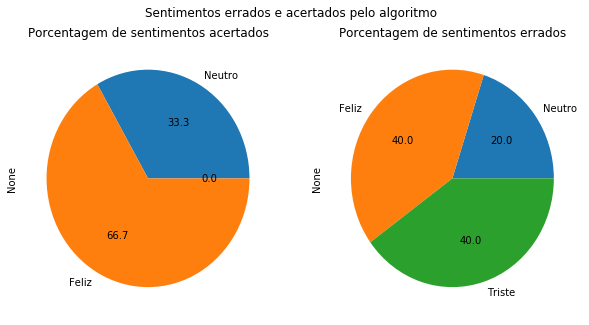

In [7]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
mdc_acerto.plot(kind='pie',title='Porcentagem de sentimentos acertados',autopct='%.1f')
plt.subplot(122)
mdc_erro.plot(kind='pie',title='Porcentagem de sentimentos errados',autopct='%.1f')
fig.suptitle('Sentimentos errados e acertados pelo algoritmo')
plt.show()

In [18]:
n=neutro["Acerto"]+neutro["Erro"]
neutro["Acerto"]=100*neutro["Acerto"]/(n)
neutro["Erro"]=100*neutro["Erro"]/(n)

f=feliz["Acerto"]+feliz["Erro"]
feliz["Acerto"]=100*feliz["Acerto"]/(f)
feliz["Erro"]=100*feliz["Erro"]/(f)

t=triste["Acerto"]+triste["Erro"]
triste["Acerto"]=100*triste["Acerto"]/(t)
triste["Erro"]=100*triste["Erro"]/(t)

Tabela=pd.DataFrame(data=[neutro,feliz,triste], index=["Neutro","Feliz","Triste"])

print("Porcentagem de erros e acertos para cada sentimento")
Tabela

Porcentagem de erros e acertos para cada sentimento


,Acerto,Erro
Neutro,50,50
Feliz,50,50
Triste,0,100
